In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np
import drnb as nb

time: 4.46 s (started: 2022-09-04 17:51:30 -07:00)


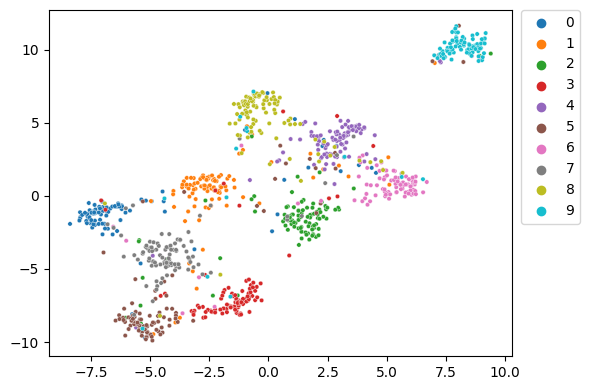

time: 1.32 s (started: 2022-09-04 17:51:34 -07:00)


In [2]:
s1k_pacmap = nb.embed_data("s1k", method="pacmap")

PaCMAP parameters from [the Python docstring](https://github.com/YingfanWang/PaCMAP/blob/master/source/pacmap/pacmap.py):

* `n_neighbors=10`
* `MN_ratio=0.5` Ratio of mid near pairs to nearest neighbor pairs (e.g. `n_neighbors=10, MN_ratio=0.5` --> 5 Mid near pairs).
* `FP_ratio=2.0` Ratio of further pairs to nearest neighbor pairs (e.g. `n_neighbors=10, FP_ratio=2` --> 20 Further pairs).
* `pair_neighbors=None`: `numpy.ndarray` of shape `(X.shape[0] * n_neighbors, 2)`, Pre-calculated nearest neighbor pairs. There will be `n_neighbors` pairs per item `i`, of the form `[i, j]` where `j` is the index of the neighbors.
* `pair_MN=None`: `numpy.ndarray` of shape `(X.shape[0] * n_mid_near, 2)`. Pre-calculated mid near pairs.
* `pair_FP=None`: `numpy.ndarray` of shape `(X.shape[0] * n_further_pair, 2)`. Pre-calculated further pairs.
* `distance="euclidean"`: distance metric. One of: `"euclidean"`, `"manhattan"`, `"angular"`, `"hamming"`.
* `lr=1.0`: learning rate of the Adam optimizer.
* `num_iters=450`. Number of iterations (epochs in UMAP-speak). Internally, different weights are used for the different types of pairs based on the absolute value of the iteration number (transitions at 100 and 200 iterations), so it is recommended to set this > 250.
* `apply_pca=True`: whether to apply PCA on the input data. Ignored if `distance="hamming"` or there are fewer than 100 dimensions in the input data. Otherwise, the first 100 components from truncated SVD are extracted. Data is centered. If no PCA is applied then data is scaled to 0-1 globally (columns maintain their ratio of variances) and then mean-centered.
* `intermediate=False`: if `True`, then snapshots of the coordinates at intermediate steps of the iteration are also returned.
* `intermediate_snapshots=[0, 10, 30, 60, 100, 120, 140, 170, 200, 250, 300, 350, 450]`: the iterations at which snapshots are taken. Ignored unless `intermediate=True`. Also, it seems like the final values of the list must be the final iteration, i.e. the value of `num_iters` (so by default `450`). However, `drnb` will check this for you.
* `random_state=None`.
* `init`: one of `"pca"` (PCA scaled by 0.01, this is the default), `"random"` (t-SNE style) or a user-supplied matrix (which is [Z-scaled](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and then scaled by 1e-4).

/home/james/dev/drnb/venv/lib/python3.10/site-packages/pacmap/pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


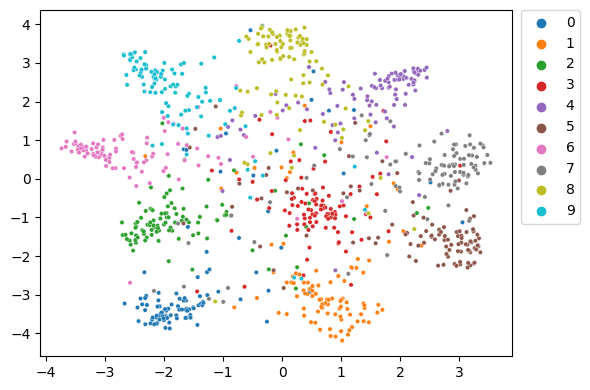

time: 710 ms (started: 2022-09-04 17:51:35 -07:00)


In [3]:
s1k_pacmap = nb.embed_data(
    "s1k",
    method=nb.embedder(
        "pacmap",
        init="random",
        params=dict(
            num_iters=100,
            random_state=42,
            intermediate=True,
            intermediate_snapshots=[0, 50],
        ),
    ),
)

In [4]:
s1k_pacmap["snapshots"].keys()

dict_keys(['it_0', 'it_50', 'it_100'])

time: 4.89 ms (started: 2022-09-04 17:51:36 -07:00)
